In [1]:
import os
import tables as tb
import numpy  as np
from matplotlib import pyplot as plt

from invisible_cities.cities.dorothea        import Dorothea
from invisible_cities.core.system_of_units_c import units
from invisible_cities.core.configure         import configure
from invisible_cities.reco.dst_functions     import load_dst
from invisible_cities.io                     import pmap_io  as pio
from invisible_cities.core import fit_functions as fitf

In [2]:
run = 0
ic_data = os.path.join(os.environ['IC_DATA'])
#pmap_path = ic_data + 'Montecarlo/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_pmaps_10000.root.h5'           # old MC
#pmap_path = '/Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5'                                 # data
pmap_path =  ic_data + 'Montecarlo/Kr/new_mc/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_1000.root.h5.h5'  # new MC
conf_path = '/Users/alej/Desktop/Valencia/nextic/IC-1/invisible_cities/config/dorothea.conf'

In [3]:
# initialize dorothea
PATH_IN  = os.path.join(pmap_path)
PATH_OUT = os.path.join('/Users/alej/Desktop/dorothea/garbage.h5')
conf     = configure(('dummy ' + conf_path).split()).as_dict
conf.update(dict(run_number = run,
                 files_in   = PATH_IN,
                 file_out   = PATH_OUT,
                 nmax       = 100000))
dorothea = Dorothea(**conf)

In [4]:
dorothea.run()


                 Dorothea will run a max of 100000 events
                 Input Files = ['/Users/alej/Desktop/IC_DATA/Montecarlo/Kr/new_mc/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_1000.root.h5.h5']
                 Output File = /Users/alej/Desktop/dorothea/garbage.h5
                          
Opening /Users/alej/Desktop/IC_DATA/Montecarlo/Kr/new_mc/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_1000.root.h5.h5... event in file = 1, total = 1
event in file = 2, total = 2
event in file = 3, total = 3
event in file = 4, total = 4
event in file = 5, total = 5
event in file = 6, total = 6
event in file = 7, total = 7
event in file = 8, total = 8
event in file = 9, total = 9
event in file = 10, total = 10
event in file = 11, total = 11
event in file = 12, total = 12
event in file = 13, total = 13
event in file = 15, total = 14
event in file = 16, total = 15
event in file = 18, total = 16
event in file = 19, total = 17
event in file = 21, total = 18
event in file = 22, total = 19
event in f

dorothea: (counter = nmax, value = 100000),  (counter = n_events_tot, value = 1000),  (counter = nevt_out, value = 822), 

In [5]:
dst = load_dst(PATH_OUT, "DST", "Events")
dst

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,0,0.0,0,1,325.0,2.262157,15.610495,100125.0,12.1000,535.090698,...,624500.0,4,524.375,524.375,140.458966,-59.372667,152.492081,-0.399925,4.978890,4.960489
1,1,0.0,0,1,150.0,1.513081,7.166867,100175.0,9.5125,720.137207,...,521500.0,4,421.325,421.325,-0.393179,10.078828,10.086494,1.609787,4.984517,4.999379
2,2,0.0,0,1,125.0,2.411021,8.709381,100100.0,9.5125,812.002441,...,388500.0,6,288.400,288.400,-58.613304,-155.605865,166.278996,-1.931037,4.803860,6.880400
3,3,0.0,0,1,100.0,1.236007,3.630503,100125.0,6.3625,1244.942139,...,236500.0,5,136.375,136.375,-127.817447,59.265396,140.888917,2.707427,5.592950,4.945741
4,4,0.0,0,1,125.0,1.212156,5.391570,100125.0,7.2750,1203.542969,...,260500.0,4,160.375,160.375,119.180642,11.408063,119.725391,0.095430,4.932408,4.797641
5,5,0.0,0,1,200.0,1.724599,10.124714,100150.0,9.3875,740.554688,...,501500.0,4,401.350,401.350,118.998764,-58.367282,132.542241,-0.456008,4.898727,4.725911
6,6,0.0,0,1,125.0,1.676572,8.569830,100125.0,6.2250,1527.101318,...,215500.0,5,115.375,115.375,-30.498348,-47.385959,56.352270,-2.142670,4.975103,5.251612
7,7,0.0,0,1,150.0,1.950734,11.223466,100100.0,6.8500,857.399597,...,284500.0,6,184.400,184.400,-141.696225,-113.488514,181.541904,-2.466286,4.703490,6.280759
8,8,0.0,0,1,175.0,1.896191,10.278227,100150.0,7.4375,759.918640,...,310500.0,6,210.350,210.350,146.291025,-117.517548,187.647110,-0.676758,5.583360,5.801843
9,9,0.0,0,1,150.0,1.807488,9.744901,100125.0,8.4375,872.061646,...,394500.0,7,294.375,294.375,-59.584368,65.237791,88.353077,2.310934,6.181736,6.129774


In [6]:
events_in_dst = dst.event.values
n_events_represented_in_dst = len(set(events_in_dst))
print('Event efficiency: ' + str(n_events_represented_in_dst / dorothea.cnt.cd['n_events_tot']))

Event efficiency: 0.822


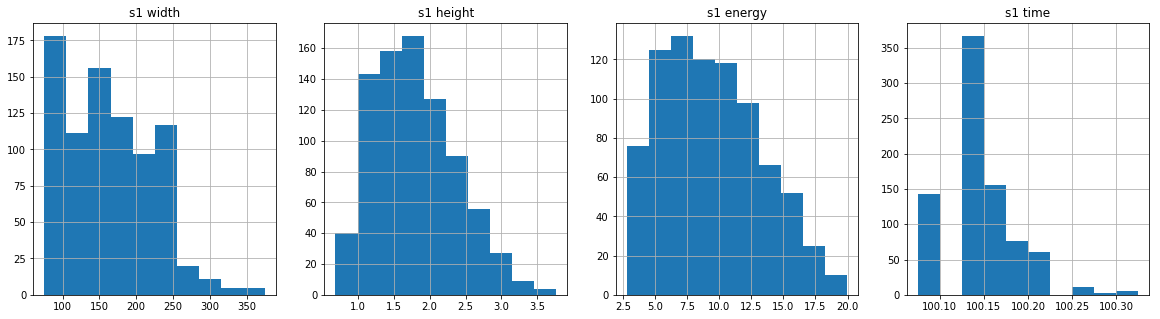

In [7]:
plt.figure(figsize=(20,5))
subplot=141
for feature, lab in zip([dst.S1w, dst.S1h, dst.S1e, dst.S1t], 
                   ['s1 width (mus)', 's1 height (pes)', 's1 energy (pes)', 's1 time (mus)']):
    plt.subplot(subplot)
    if lab=='s1 time':plt.hist(feature / units.mus)
    else:plt.hist(feature)
    plt.title(lab)
    plt.grid(True)
    subplot+=1
plt.show()  

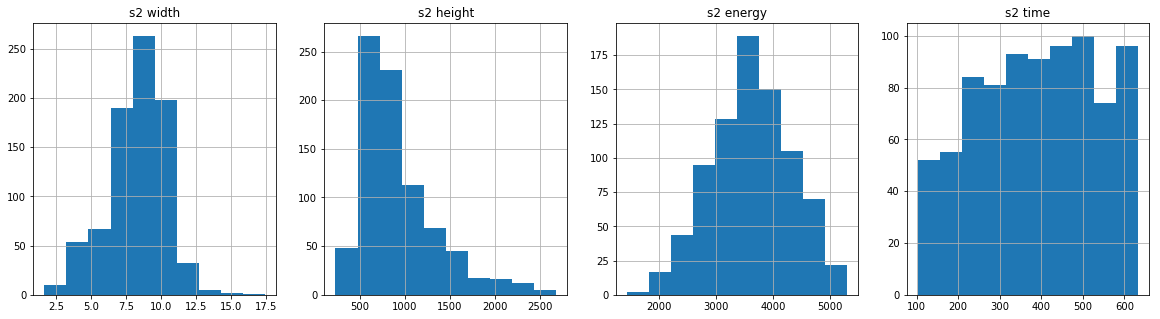

In [8]:
plt.figure(figsize=(20,5))
subplot=141
for feature, lab in zip([dst.S2w, dst.S2h, dst.S2e, dst.S2t], 
                   ['s2 width (mus)', 's2 height (pes)', 's2 energy (pes)', 's2 time (mus)']):
    plt.subplot(subplot)
    if lab=='s2 time':plt.hist(feature / units.mus)
    else:plt.hist(feature)
    plt.title(lab)
    plt.grid(True)
    #plt.yscale('log')
    subplot+=1
plt.show()  

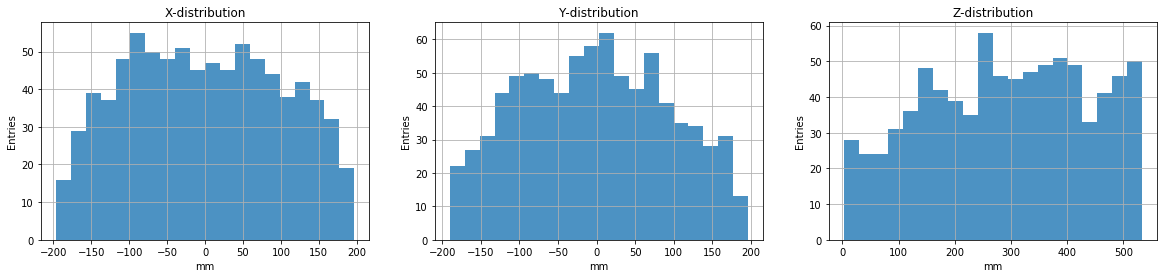

In [9]:
plt.figure(figsize=(20,4))
subplot=131
for feature, coord in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist(feature, bins=20, alpha=.8)
    plt.title(coord + '-distribution')
    plt.xlabel('mm')
    plt.ylabel('Entries')
    plt.grid(True)
    subplot+=1
plt.show()

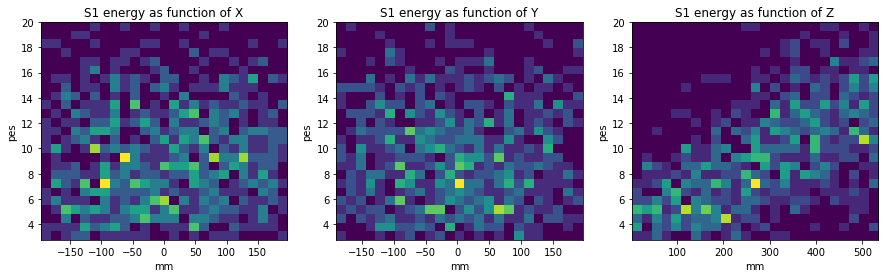

In [10]:
plt.figure(figsize=(15,4))
subplot=131
for feature, lab in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist2d(feature, dst.S1e, bins=25)
    plt.title('S1 energy as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    subplot+=1
plt.show()

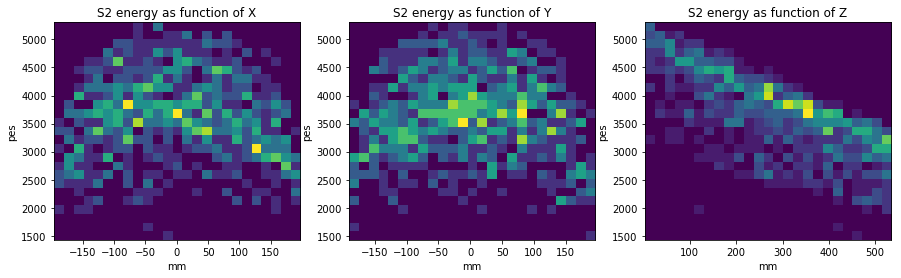

In [11]:
plt.figure(figsize=(15,4))
subplot=131
for feature, lab in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist2d(feature, dst.S2e, bins=25)
    plt.title('S2 energy as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    #plt.ylim(2e3,2.5e3)
    subplot+=1
plt.show()

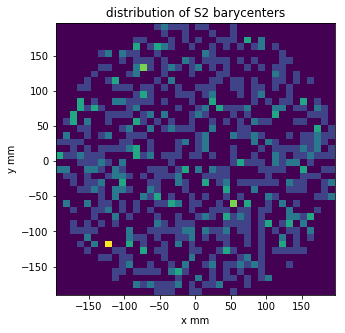

In [16]:
plt.figure(figsize=(5,5))
plt.hist2d(dst.X, dst.Y, bins=(40, 40))
plt.xlabel('x mm') 
plt.ylabel('y mm')
plt.title('distribution of S2 barycenters')
plt.show()

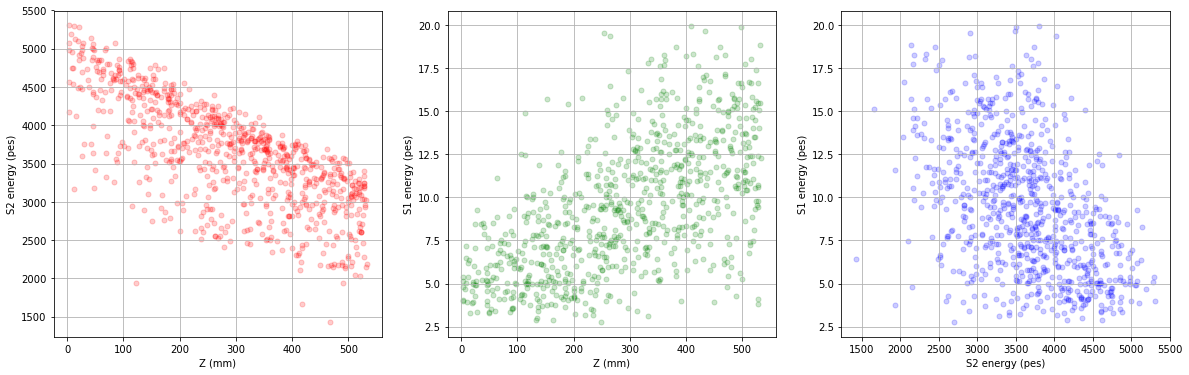

In [21]:
figsize=(20,6)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 3, 1)
#plt.hist2d(dst.Z, dst.S2e, bins=(25, 25))
plt.scatter(dst.Z, dst.S2e, c='r', s=25, alpha=.2)
plt.xlabel('Z (mm)')
plt.ylabel('S2 energy (pes)')
plt.grid(True)

ax = plt.subplot(1, 3, 2)
#plt.hist2d(dst.Z, dst.S1e, bins=(25, 25))
plt.scatter(dst.Z, dst.S1e, c='g', s=25, alpha=.2)
plt.xlabel('Z (mm)')
plt.ylabel('S1 energy (pes)')
plt.grid(True)

ax = plt.subplot(1, 3, 3)
#plt.hist2d(dst.S2e, dst.S1e, bins=(25, 25))
plt.scatter(dst.S2e, dst.S1e, c='b', s=25, alpha=.2)
plt.xlabel('S2 energy (pes)')
plt.ylabel('S1 energy (pes)')
plt.grid(True)
plt.show()

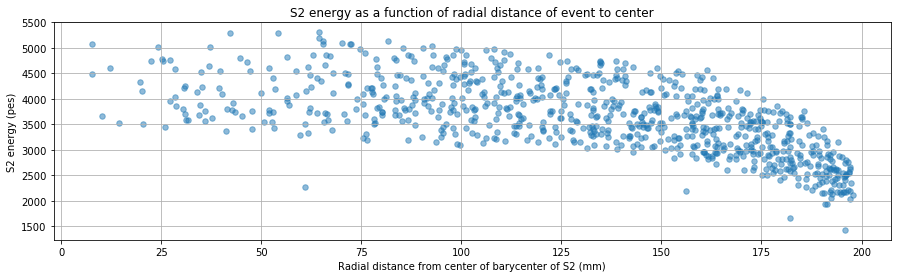

In [24]:
plt.figure(figsize=(15,4))
plt.scatter(dst.R, dst.S2e, s=30, alpha=.5)
plt.grid(True)
plt.title('S2 energy as a function of radial distance of event to center')
plt.xlabel('Radial distance from center of barycenter of S2 (mm)')
plt.ylabel('S2 energy (pes)')
#plt.ylim(None,20000)
plt.show()

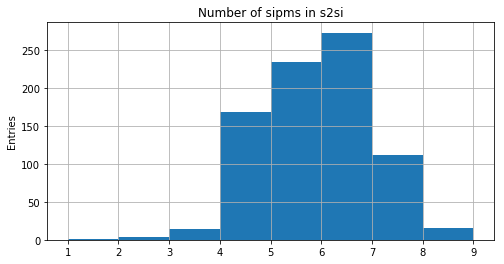

In [25]:
plt.figure(figsize=(8,4))
plt.hist(dst.Nsipm, bins=range(1, dst.Nsipm.max()+1))
plt.grid(True)
#plt.xlim(None,40)
plt.ylabel('Entries')
plt.title('Number of sipms in s2si')
plt.show()